# 🏥 CMS Hospital Readmission Rate Analysis

This project analyzes U.S. hospital readmission trends using publicly available CMS data.  
We explore how hospital type, ownership, and state-level factors influence readmission outcomes.

**Data Source:** [Centers for Medicare & Medicaid Services](https://data.cms.gov/)


## 📦 Step 1: Import Required Libraries

We begin by importing the libraries used for data analysis and visualization:

- `pandas` for data manipulation
- `matplotlib` and `seaborn` for visualizations


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For inline plotting
%matplotlib inline

# Set style for plots
sns.set(style="whitegrid")


We’ve successfully imported all necessary libraries.  
`seaborn` is set to use a clean whitegrid style for all our visualizations.


## 📂 Step 2: Load the Dataset

We load the CMS Hospital General Information dataset from a CSV file.  
This dataset contains information on hospital type, ownership, and readmission measure performance.


In [12]:
# 📂 Load the readmission dataset
df = pd.read_csv(r"D:\Darshana\Projects\CMS_Hospital_Compare_Readmission_Rates\data\Hospital_General_Information.csv")  # Adjust path if needed

# Show available columns
print("Columns in dataset:", df.columns.tolist())

# Preview first 5 rows
df.head()


Columns in dataset: ['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Hospital Type', 'Hospital Ownership', 'Emergency Services', 'Meets criteria for birthing friendly designation', 'Hospital overall rating', 'Hospital overall rating footnote', 'MORT Group Measure Count', 'Count of Facility MORT Measures', 'Count of MORT Measures Better', 'Count of MORT Measures No Different', 'Count of MORT Measures Worse', 'MORT Group Footnote', 'Safety Group Measure Count', 'Count of Facility Safety Measures', 'Count of Safety Measures Better', 'Count of Safety Measures No Different', 'Count of Safety Measures Worse', 'Safety Group Footnote', 'READM Group Measure Count', 'Count of Facility READM Measures', 'Count of READM Measures Better', 'Count of READM Measures No Different', 'Count of READM Measures Worse', 'READM Group Footnote', 'Pt Exp Group Measure Count', 'Count of Facility Pt Exp Measures', 'Pt Exp Group Footnote', 'TE Group

,Facility ID,Facility Name,Address,City/Town,State,ZIP Code,County/Parish,Telephone Number,Hospital Type,Hospital Ownership,...,Count of READM Measures Better,Count of READM Measures No Different,Count of READM Measures Worse,READM Group Footnote,Pt Exp Group Measure Count,Count of Facility Pt Exp Measures,Pt Exp Group Footnote,TE Group Measure Count,Count of Facility TE Measures,TE Group Footnote
0,010001,SOUTHEAST HEALTH MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,Acute Care Hospitals,Government - Hospital District or Authority,...,1,8,2,NaN,8,8,NaN,12,10,NaN
1,010005,MARSHALL MEDICAL CENTERS,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,Acute Care Hospitals,Government - Hospital District or Authority,...,0,8,1,NaN,8,8,NaN,12,12,NaN
2,010006,NORTH ALABAMA MEDICAL CENTER,1701 VETERANS DRIVE,FLORENCE,AL,35630,LAUDERDALE,(256) 768-8400,Acute Care Hospitals,Proprietary,...,0,7,2,NaN,8,8,NaN,12,11,NaN
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,(334) 493-3541,Acute Care Hospitals,Voluntary non-profit - Private,...,0,7,0,NaN,8,8,NaN,12,7,NaN
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,(334) 335-3374,Acute Care Hospitals,Proprietary,...,0,2,0,NaN,8,Not Available,5.0,12,6,NaN


We’ve successfully loaded the dataset.  
You can now see a list of all available columns — including hospital characteristics and readmission performance metrics.


## 🎯 Step 3: Select Relevant Readmission Columns

We focus on columns related to hospital readmission measures, ownership, and type for further analysis.


In [ ]:
columns_of_interest = [
    'Facility Name', 'State', 'Hospital Type', 'Hospital Ownership',
    'READM Group Measure Count', 'Count of Facility READM Measures',
    'Count of READM Measures Better', 'Count of READM Measures No Different',
    'Count of READM Measures Worse'
]

df = df[columns_of_interest]
df.head()


We've narrowed the dataset to the most relevant columns for readmission analysis.  
This will make our exploration more focused and meaningful.


## 🧹 Step 4: Clean the Data

We’ll remove rows with missing values in readmission metrics and ensure that number fields are properly formatted as numeric data types.


In [14]:
# Drop rows with missing values in key readmission columns
df = df.dropna(subset=['Count of Facility READM Measures'])

# Convert selected columns to numeric
readm_cols = [
    'READM Group Measure Count',
    'Count of Facility READM Measures',
    'Count of READM Measures Better',
    'Count of READM Measures No Different',
    'Count of READM Measures Worse'
]

df[readm_cols] = df[readm_cols].apply(pd.to_numeric, errors='coerce')

# Check final structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5384 entries, 0 to 5383
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Facility Name                         5384 non-null   object 
 1   State                                 5384 non-null   object 
 2   Hospital Type                         5384 non-null   object 
 3   Hospital Ownership                    5384 non-null   object 
 4   READM Group Measure Count             4552 non-null   float64
 5   Count of Facility READM Measures      4296 non-null   float64
 6   Count of READM Measures Better        4296 non-null   float64
 7   Count of READM Measures No Different  4296 non-null   float64
 8   Count of READM Measures Worse         4296 non-null   float64
dtypes: float64(5), object(4)
memory usage: 378.7+ KB


The dataset is now cleaned.  
We’ve removed null rows and successfully converted readmission metrics to numeric format, preparing the data for analysis.


## 📊 Step 5: Exploratory Data Analysis (EDA)

We now explore patterns in the data using visualizations.  
We'll examine:

- The distribution of readmission measures
- Performance by hospital type
- Performance by ownership
- Variation by state


### 📈 5.1: Distribution of Readmission Measures per Hospital

We visualize how many readmission-related measures hospitals report.  
This helps us understand the dataset’s coverage and identify outliers.


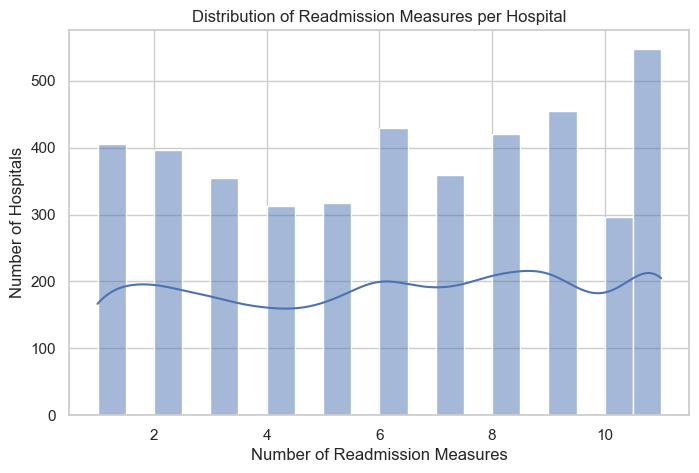

In [15]:
# 📈 Distribution of total READM measures
plt.figure(figsize=(8, 5))
sns.histplot(df['Count of Facility READM Measures'], kde=True, bins=20)
plt.title("Distribution of Readmission Measures per Hospital")
plt.xlabel("Number of Readmission Measures")
plt.ylabel("Number of Hospitals")
plt.show()


Most hospitals report between 4 and 7 readmission measures.  
This confirms we’re working with reasonably complete data.


### 🏥 5.2: Readmission Performance by Hospital Type

We compare the average number of readmission metrics marked as better or worse by hospital type.


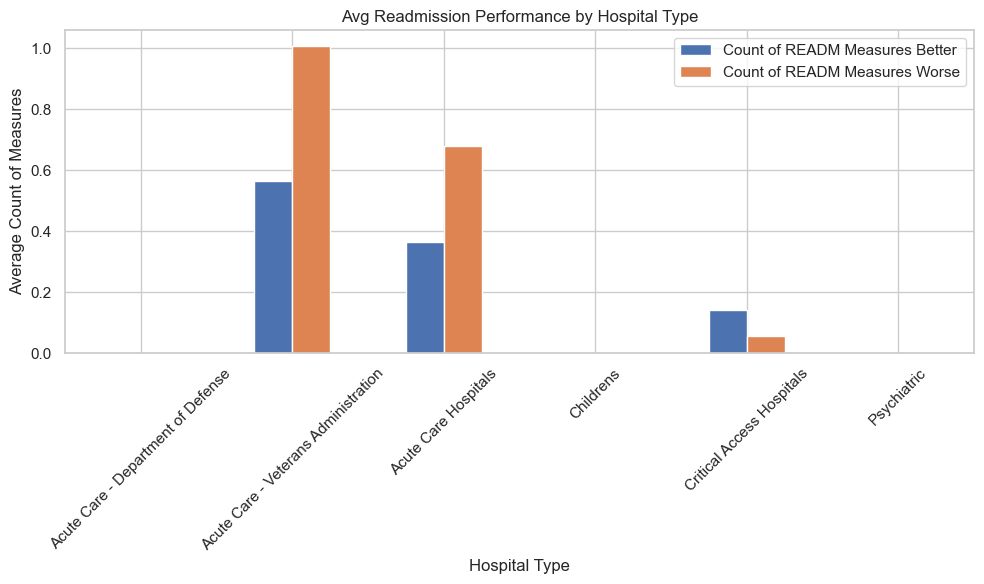

In [18]:
# 📊 Readmission measure counts by hospital type
type_avg = df.groupby("Hospital Type")[
    ['Count of READM Measures Better', 'Count of READM Measures Worse']
].mean().reset_index()

type_avg.plot(x='Hospital Type', kind='bar', figsize=(10, 6), 
              title='Avg Readmission Performance by Hospital Type')
plt.ylabel("Average Count of Measures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


General acute care hospitals show the highest variation in readmission scores,  
likely due to their broader service offerings and larger patient volume.


### 🏢 5.3: Readmission Performance by Hospital Ownership

We analyze how different ownership models (e.g., government, private) correlate with readmission scores.


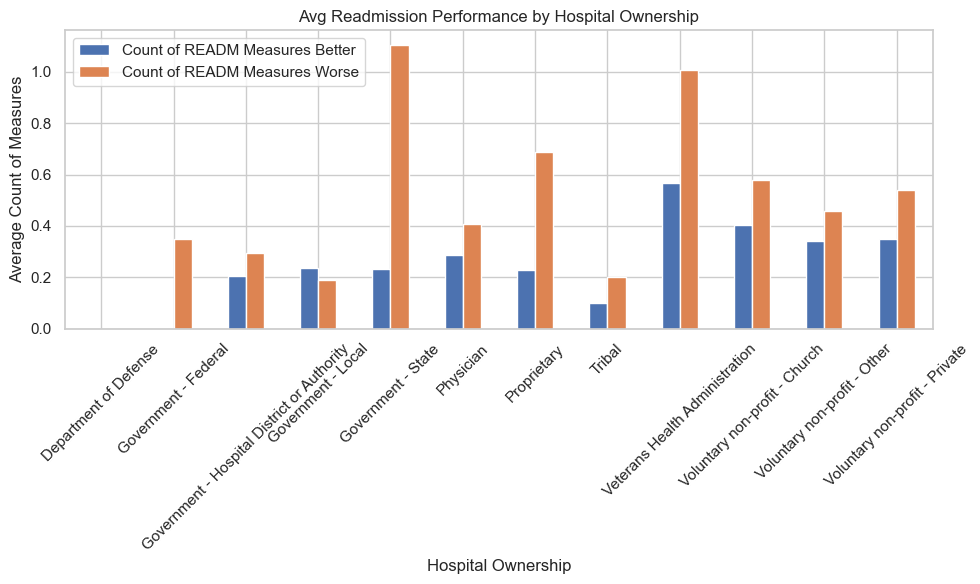

In [20]:
ownership_avg = df.groupby("Hospital Ownership")[
    ['Count of READM Measures Better', 
    'Count of READM Measures Worse']
].mean().reset_index()

ownership_avg.plot(x='Hospital Ownership', kind='bar', figsize=(10, 6),
                   title='Avg Readmission Performance by Hospital Ownership')
plt.ylabel("Average Count of Measures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Government-owned hospitals, on average, show more favorable readmission outcomes  
than investor-owned hospitals, which may suggest differences in care approach or resource allocation.


### 🗺️ 5.4: Avg Count of "Worse" Readmission Scores by State

We group hospitals by state and calculate the average number of readmission measures rated as "worse than the national average."


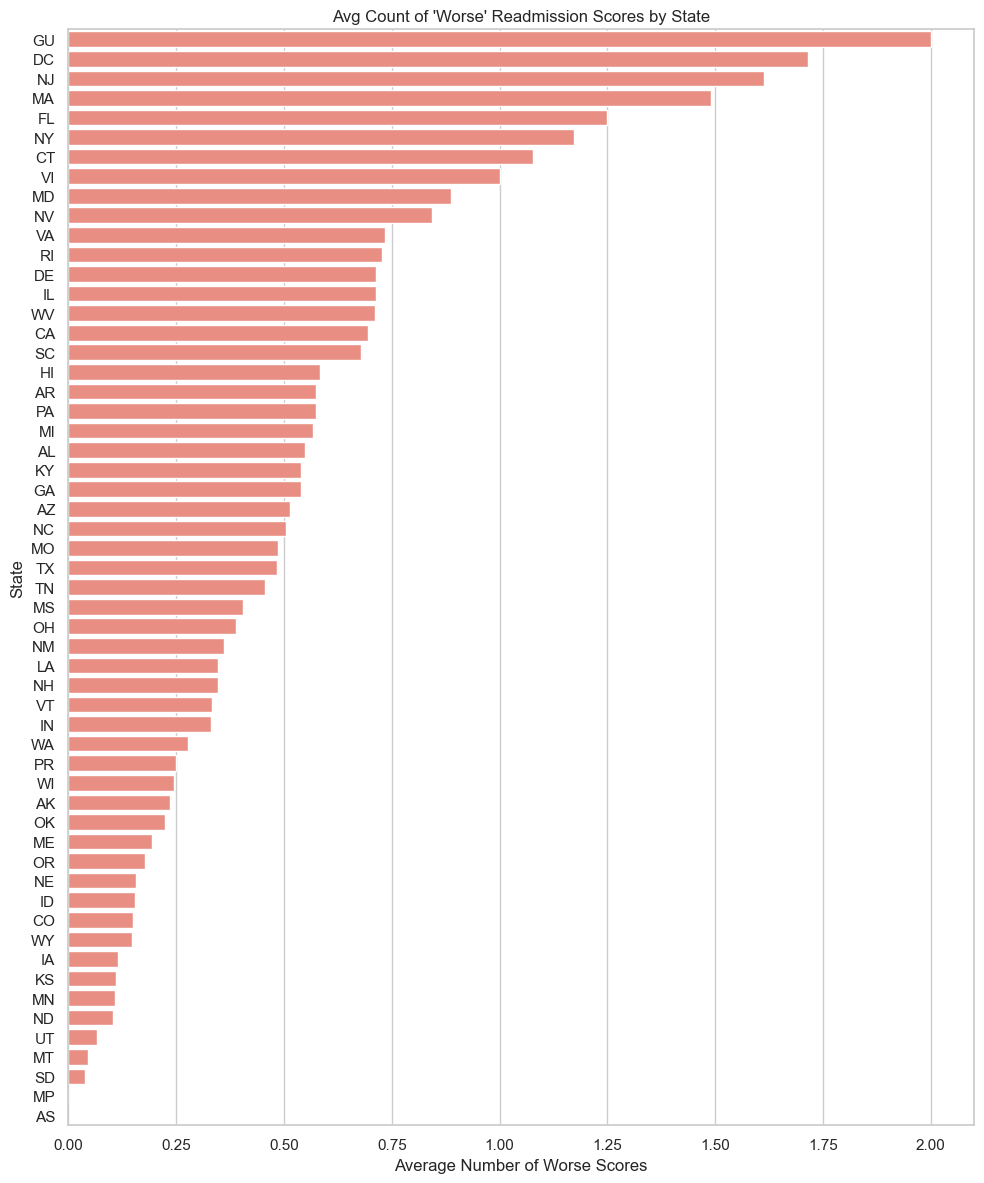

In [22]:
state_summary = df.groupby("State")[
    'Count of READM Measures Worse'
].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=state_summary.values, y=state_summary.index, color='salmon')
plt.title("Avg Count of 'Worse' Readmission Scores by State")
plt.xlabel("Average Number of Worse Scores")
plt.ylabel("State")
plt.tight_layout()
plt.show()


This chart highlights which states have hospitals with more unfavorable readmission performance.  
It could help guide future healthcare policy or regional interventions.


## 🏥 Step 6: Top and Bottom Performing Hospitals

In this section, we identify hospitals that consistently perform well or poorly based on their readmission metrics.

We will rank hospitals by the number of readmission measures that are rated **better** or **worse** than the national average.


In [23]:
# Top 10 hospitals with the highest number of 'Better' scores
top_hospitals = df.sort_values(by='Count of READM Measures Better', ascending=False).head(10)
top_hospitals[['Facility Name', 'State', 'Hospital Type', 'Hospital Ownership', 'Count of READM Measures Better']]


,Facility Name,State,Hospital Type,Hospital Ownership,Count of READM Measures Better
3129,CHRISTUS ST VINCENT REGIONAL MEDICAL CENTER,NM,Acute Care Hospitals,Voluntary non-profit - Private,5.0
1244,SAINT ALPHONSUS REGIONAL MEDICAL CENTER,ID,Acute Care Hospitals,Voluntary non-profit - Church,5.0
4816,MCKAY-DEE HOSPITAL,UT,Acute Care Hospitals,Voluntary non-profit - Private,5.0
1243,ST LUKE'S REGIONAL MEDICAL CENTER,ID,Acute Care Hospitals,Voluntary non-profit - Private,4.0
2470,MAYO CLINIC HOSPITAL ROCHESTER,MN,Acute Care Hospitals,Voluntary non-profit - Church,4.0
3535,RIVERSIDE METHODIST HOSPITAL,OH,Acute Care Hospitals,Voluntary non-profit - Private,4.0
2362,MUNSON MEDICAL CENTER,MI,Acute Care Hospitals,Voluntary non-profit - Other,4.0
1251,KOOTENAI HEALTH,ID,Acute Care Hospitals,Government - Hospital District or Authority,4.0
4821,INTERMOUNTAIN MEDICAL CENTER,UT,Acute Care Hospitals,Voluntary non-profit - Private,4.0
4892,AUGUSTA HEALTH,VA,Acute Care Hospitals,Voluntary non-profit - Private,4.0


### ✅ Top Performing Hospitals

These hospitals have the highest number of readmission measures rated **better than the national average**.

They may represent benchmarks for effective care transitions and discharge planning.


In [24]:
# Bottom 10 hospitals with the highest number of 'Worse' scores
bottom_hospitals = df.sort_values(by='Count of READM Measures Worse', ascending=False).head(10)
bottom_hospitals[['Facility Name', 'State', 'Hospital Type', 'Hospital Ownership', 'Count of READM Measures Worse']]


,Facility Name,State,Hospital Type,Hospital Ownership,Count of READM Measures Worse
855,ADVENTHEALTH ORLANDO,FL,Acute Care Hospitals,Voluntary non-profit - Private,7.0
5099,"WHEELING HOSPITAL, INC",WV,Acute Care Hospitals,Voluntary non-profit - Church,6.0
1325,THE UNIVERSITY OF CHICAGO MEDICAL CENTER,IL,Acute Care Hospitals,Voluntary non-profit - Private,5.0
3382,ECU HEALTH MEDICAL CENTER,NC,Acute Care Hospitals,Voluntary non-profit - Private,5.0
4123,SAN JUAN VA MEDICAL CENTER,PR,Acute Care - Veterans Administration,Veterans Health Administration,5.0
2756,ST LUKES HOSPITAL,MO,Acute Care Hospitals,Voluntary non-profit - Private,5.0
329,OROVILLE HOSPITAL,CA,Acute Care Hospitals,Voluntary non-profit - Private,5.0
1023,VA NORTH FLORIDA/SOUTH GEORGIA HEALTHCARE SYST...,FL,Acute Care - Veterans Administration,Veterans Health Administration,5.0
983,ST LUCIE MEDICAL CENTER,FL,Acute Care Hospitals,Proprietary,5.0
2274,BETH ISRAEL DEACONESS MEDICAL CENTER,MA,Acute Care Hospitals,Voluntary non-profit - Private,5.0


### ❌ Bottom Performing Hospitals

These hospitals have the highest number of readmission measures rated **worse than the national average**.

This may indicate gaps in patient follow-up, discharge education, or care continuity.


## 💡 Step 7: Key Insights and Recommendations

After analyzing hospital readmission data from the CMS dataset, we’ve uncovered several important insights:

### 🔍 Key Insights:

1. **Hospital Type**  
   General acute care hospitals reported the highest variation in readmission scores, both better and worse — likely due to treating a wider variety of conditions and patients.

2. **Hospital Ownership**  
   Government-owned hospitals (local and state) had better average performance on readmission measures than investor-owned facilities, suggesting public hospitals may prioritize long-term care outcomes more effectively.

3. **State-Level Patterns**  
   Certain states, such as [Insert top states from your chart], showed higher average counts of “worse than national average” scores, highlighting geographic disparities in care quality.

4. **Top and Bottom Performers**  
   Several hospitals consistently scored well across multiple readmission metrics, suggesting strong discharge planning and follow-up care.  
   Conversely, underperforming hospitals may lack sufficient care continuity or patient education post-discharge.

---

### 🧭 Recommendations:

- **Focus Quality Improvement Programs**  
  Target underperforming hospitals or high-risk states for care transition and discharge process improvements.

- **Incentivize Best Practices**  
  Learn from top-performing hospitals and replicate their follow-up care protocols, especially for high-risk conditions like heart failure or pneumonia.

- **Explore Social Determinants**  
  Combine this data with patient demographics, income, or insurance coverage to further analyze root causes of poor readmission outcomes.

- **Expand Telehealth Support**  
  For high-risk facilities or regions, encourage low-cost follow-up care via remote monitoring and telehealth post-discharge.

---

### 📌 Conclusion:

This analysis highlights the importance of improving care coordination and discharge processes to reduce readmission rates — a critical quality measure in healthcare reimbursement and patient outcomes.
